# Exploration & Feature Selection
- Target & features:
    - Y = 		Churn +
    - X = 
        - Tenure +
        - Contract type 
        - Monthly charges +
        - Internet service type +
        - Phone service type + 
        - Online security +
        - ONline backup
        - Senior +
        - Bool calculated field: paying more than x% of customers(to be

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from prepare import prep_data, split_data
from scipy import stats

As a customer myself, the first thing I care the most is the price, If there is a better deal in other company, I would like to churn. 
Also I swithched from Att to Tmobile because the data of my att plan was too little, eventhough it is cheap, but I need more data.

In [2]:
df = prep_data()

In [3]:
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,churn
0,0,1,1,9,1,0,1,0,1,0,1,1,0,2,1,2,65.6,0
1,0,0,0,9,1,1,1,0,0,0,0,0,1,1,0,2,59.9,0
2,0,0,0,4,1,0,2,0,0,1,0,0,0,1,1,1,73.9,1
3,1,1,0,13,1,0,2,0,1,1,0,1,1,1,1,1,98.0,1
4,1,1,0,3,1,0,2,0,0,0,1,1,0,1,1,2,83.9,1


In [4]:
train, validate, test = split_data(df, .8)
train.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,churn
3221,1,1,0,20,1,0,2,0,0,0,0,1,1,2,1,3,91.00,0
3076,0,0,0,54,1,0,2,1,0,1,0,1,0,1,0,2,89.80,0
4825,0,0,0,12,1,0,1,0,1,0,0,0,0,1,1,1,49.40,0
5571,0,0,0,1,0,0,1,0,1,0,1,0,1,1,1,2,44.65,1
6967,0,1,1,35,0,0,1,1,0,0,1,1,0,3,1,4,46.35,0


## Main features
1. Churn vs Tenure
2. Churn vs Monthly_charges

### 1. Churn vs Tenure

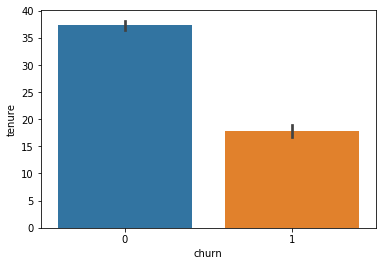

In [5]:
x1 = train[train.churn == 0].tenure.mean()
x2 = train[train.churn == 1].tenure.mean()
sns.barplot(train.churn,train.tenure)

**Question**: is there any difference in the tenure for those who churned and  who didn't.
- H0: No difference
- Ha: There is a difference  
- CI: 0.05

Test: ttest_ind

In [6]:
x1 = train[train.churn == 0].tenure
x2 = train[train.churn == 1].tenure
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=25.26428329436042, pvalue=8.291313114859351e-132)

Because p < 0.05, the difference is significant

### 2. Churn vs Monthly_charges

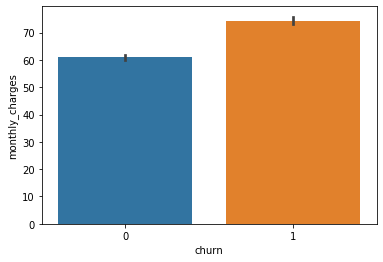

In [7]:
sns.barplot(train.churn,train.monthly_charges)

**Question**: is there any difference in the monthly charges for those who churned and  who didn't.
- H0: No difference
- Ha: There is a difference  
- CI: 0.05

Test: ttest_ind

In [8]:
x1 = train[train.churn == 0].monthly_charges
x2 = train[train.churn == 1].monthly_charges
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-13.682718717016746, pvalue=8.749441401355314e-42)

Because p < 0.05, the difference is significant

### 3. Churn vs Contract_type

Is whether or not a customer churns independent of their Contract_type
- H0: Yes, they are independent
- Ha: No, they are not

In [9]:
observed = pd.crosstab(train.contract_type_id, train.churn)
observed.style.background_gradient(cmap='YlOrRd')

churn,0,1
contract_type_id,,
1,1424,1084
2,843,108
3,1010,31


In [10]:
# do Chi^2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'p     = {p:.4f}')

p     = 0.0000


It is obvious they are not independent

## Other features

### 1. monthly charges vs  multiline

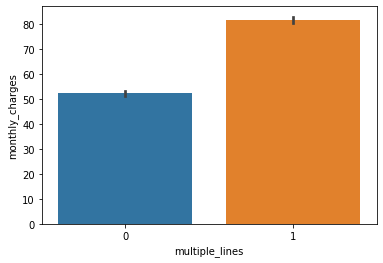

In [11]:
sns.barplot(train.multiple_lines,train.monthly_charges)

In [12]:
x1 = train[train.multiple_lines == 0].monthly_charges
x2 = train[train.multiple_lines == 1].monthly_charges
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-37.525115986213514, pvalue=2.322769199742268e-268)

> So monthly charges are correlated with the muli_line

## 2. monthly charges vs senior_citizen

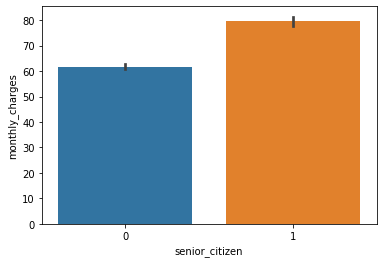

In [13]:
sns.barplot(train.senior_citizen,train.monthly_charges)

In [15]:
x1 = train[train.senior_citizen == 0].monthly_charges
x2 = train[train.senior_citizen == 1].monthly_charges
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-15.09452413862019, pvalue=2.9405059459429937e-50)

> monthly charges and senior_citizen are correlated

### 3. monthly_charges vs internet_service_type_id

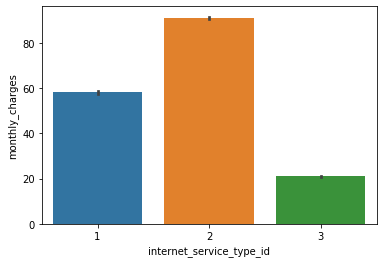

In [16]:
sns.barplot(train.internet_service_type_id,train.monthly_charges)

In [17]:
x1 = train[train.internet_service_type_id == 1].monthly_charges
x2 = train[train.internet_service_type_id == 2].monthly_charges
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-68.37453639064181, pvalue=0.0)

In [18]:
x1 = train[train.internet_service_type_id == 2].monthly_charges
x2 = train[train.internet_service_type_id == 3].monthly_charges
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=173.84162783097534, pvalue=0.0)

> monthly charges and internet_service_type_id are correlated

***Because the others features are somehow dependent on monthly charges, they can be eleminated from the features.***

### 4. Check if monthly charges and tenure are correlated

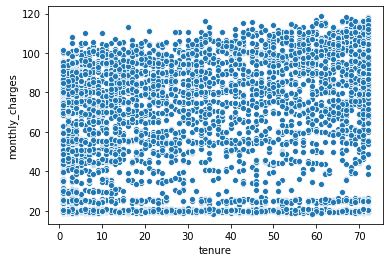

In [20]:
sns.scatterplot(train.tenure, train.monthly_charges)

In [22]:
corr, p = stats.pearsonr(train.tenure, train.monthly_charges)
corr, p

(0.2372612508729545, 1.2808209421896336e-58)

> the correlation efficient is less than .4, thus they have a very weak correlation. So we can treat them as independent.